In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# In this notebook we will explore the zomato data and will try to find out insights from the data.

The basic idea behind analyzing the Zomato Banglore's restaurant dataset is to get a fair idea about the factors affecting the establishment
of different types of restaurant at different places in Bengaluru.

Analysing Zomato dataset can give us some insights of the food industry in Bangalore.

Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world.Bengaluru being an IT capital of India.

Most of
the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves.With such an overwhelming demand of restaurants it has therefore become important to study the demography
of a location. What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food.
If yes then is that locality populated by a particular sect of people

Our analysis will be based on factor such as-:

Location of the restaurant

Approx Price of food

Which locality of that city serves that cuisines with maximum number of restaurants

The needs of people who are striving to get the best cuisine of the neighborhood

Is a particular neighborhood famous for its own kind of food.

In [2]:
df = pd.read_csv("zomato.csv")

In [3]:
df.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
#Getting the columns we have in our dataset
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

## Columns description

1. url contains the url of the restaurant in the zomato website

2. address contains the address of the restaurant in Bengaluru

3. name contains the name of the restaurant

4. online_order whether online ordering is available in the restaurant or not

5. book_table table book option available or not

6. rate contains the overall rating of the restaurant out of 5

7. votes contains total number of rating for the restaurant as of the above mentioned date

8. phone contains the phone number of the restaurant

9. location contains the neighborhood in which the restaurant is located

10. rest_type restaurant type

11. dish_liked dishes people liked in the restaurant

12. cuisines food styles, separated by comma

13. approx_cost(for two people) contains the approximate cost for meal for two people

14. reviews_list list of tuples containing reviews for the restaurant, each tuple

15. menu_item contains list of menus available in the restaurant

16. listed_in(type) type of meal

17. listed_in(city) contains the neighborhood in which the restaurant is listed

In [5]:
#Datatypes of the columns
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [6]:
#Shape of the data
df.shape
#We have around 51 thousand record in our dataset each containing 17 columns

(51717, 17)

# Cleaning the data

In [7]:
#Now first thing before beginning with the exploration, we have to check for the nan(not assigned) values in our dataset and handle them.
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
features_na = [feature for feature in df.columns if df[feature].isnull().sum()>0]
features_na
#Below are the column which contain nan(missing) values

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [9]:
#Percentage of nan(missing) values in our features
for feature in features_na:
    print(' {} has {} percent missing values'.format(feature,np.round((df[feature].isnull().sum()/len(df))*100,2)))

 rate has 15.03 percent missing values
 phone has 2.34 percent missing values
 location has 0.04 percent missing values
 rest_type has 0.44 percent missing values
 dish_liked has 54.29 percent missing values
 cuisines has 0.09 percent missing values
 approx_cost(for two people) has 0.67 percent missing values


So as from the above percentage of missing values we can see that some features like rate and dish_liked have quite significant percent of missing values so they need to be specially taken care while other feature also have missing values but percentage is quite low so we can delete the records with null values for these columns as the size of our dataset is around 51000 and column with null values are in range of 100-300 hundred.

In [10]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

Now we have some proper ratings as well as some improper assignments like nan(which we will deal with separately), New ,"-" so for these improper assignments one thing which we can do is either replace them with some values like say 0 but that will have affect on rating as these values are not zero's and other thing which we can do is remove records with these ratings(means we will delete where we will have improper assignments for the rating).

In [11]:
df = df[df["rate"]!="NEW"]
df = df[df["rate"]!="-"]

In [12]:
#Dropping the nan values corresponding to rate column
df.dropna(axis = "index",subset = ["rate"], inplace = True)

Insted of removing the record with null values in column rate we can also replace them with say a 2.5 rating or what we can do is try to evaluate the average rating for a restaurant and replace the null values with the average rating for the specific restaurant.

But first we will remove the null values records(or nan) and analyse then afterwards we will see it.

In [13]:
df.shape
#Now we can see that our shape is reduced as some of our records get removed where rate was not assingned

(41665, 17)

In [14]:
#Now as we can see that we have ratings not in aproper format, actually we need only some numerical value like 1.1 or 4 etc but we have slash and 5 axtra so removing it.
def removing_slash5(ip):
    return ip.split("/")[0]

df["rate"] = df["rate"].apply(removing_slash5)

In [15]:
df.head(5)
#Now we have our rate in format we want.

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [16]:
#Converting datatype of rate from object to float
df["rate"] = df["rate"].astype(float)

## Calculating average rating of each restaurants

Now as we have cleaned our rating column so next what we will do is carry out our analysis and try to find out the average rating of the restaurants.

In [17]:
df_ratings = df.groupby("name")["rate"].mean().to_frame().reset_index()

In [18]:
df_ratings

,name,rate
0,#FeelTheROLL,3.400000
1,#L-81 Cafe,3.900000
2,#refuel,3.700000
3,1000 B.C,3.200000
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
...,...,...
6644,i-Bar - The Park Bangalore,3.800000
6645,iFruit Live Ice Creams,3.400000
6646,iSpice Resto Cafe,3.700000
6647,nu.tree,4.314286


In [19]:
#Renaming the columns name
df_ratings.columns = ["Restaurant_name","Average_rating"]

In [20]:
df_ratings

,Restaurant_name,Average_rating
0,#FeelTheROLL,3.400000
1,#L-81 Cafe,3.900000
2,#refuel,3.700000
3,1000 B.C,3.200000
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
...,...,...
6644,i-Bar - The Park Bangalore,3.800000
6645,iFruit Live Ice Creams,3.400000
6646,iSpice Resto Cafe,3.700000
6647,nu.tree,4.314286


In [21]:
df_ratings.to_csv("Restaurant_ratings.csv",index=False)

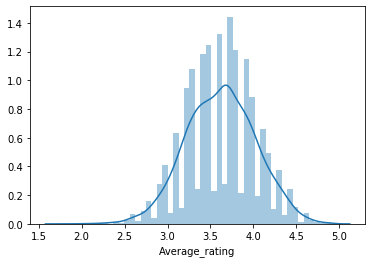

In [22]:
import seaborn as sns
sns.distplot(df_ratings["Average_rating"])

From the above plot we can see that the distribution of restaurant on average rating basis is normal distribution, we have restaurant with low average ratings as well as high average ratings.

Text(0.5, 0, 'Number of outlets')

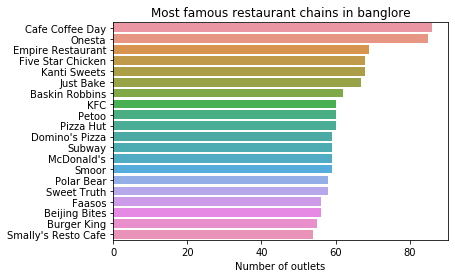

In [23]:
#Selecting top 20 restaurant out of all the approx 7000 restaurants
restaurant_t20 = df["name"].value_counts()[0:20]
sns.barplot(x = restaurant_t20,y=restaurant_t20.index)
plt.title("Most famous restaurant chains in banglore")
plt.xlabel("Number of outlets")

## Now checking the proportion of acceptance online orders

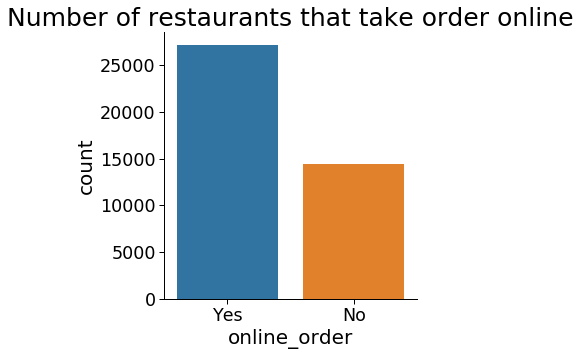

In [24]:
#Plotting number of restaurtants that take online_order
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20})   
sns.catplot(data = df, kind = 'count', x = 'online_order')
plt.title('Number of restaurants that take order online')
plt.show()

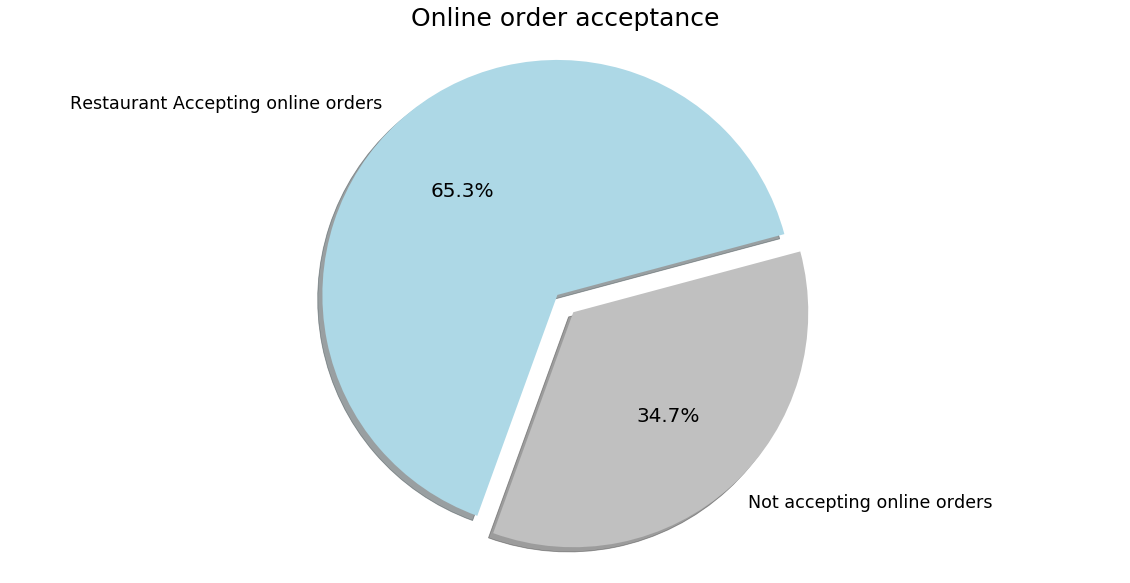

In [25]:
x = df["online_order"].value_counts()
labels = ["Restaurant Accepting online orders","Not accepting online orders"]
my_colors = ["lightblue","silver"]
fig = plt.figure(figsize = (20, 10)) 
my_explode = (0, 0.1)
plt.pie(x, labels=labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title("Online order acceptance")
plt.axis('equal')
plt.show()

## Now analysing number of restaurant which provide and do not provide tables booking facility

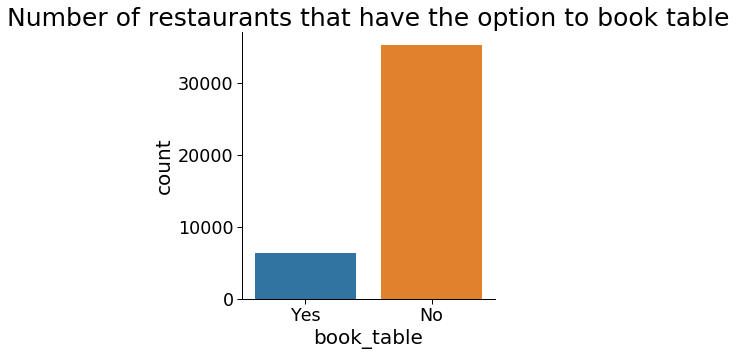

In [26]:
# plotting number of restaurants that have the option to book table
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20, "axes.titlesize": 25, "axes.labelsize": 20})   
sns.catplot(data = df, kind = 'count', x = 'book_table')
plt.title('Number of restaurants that have the option to book table')
plt.show()

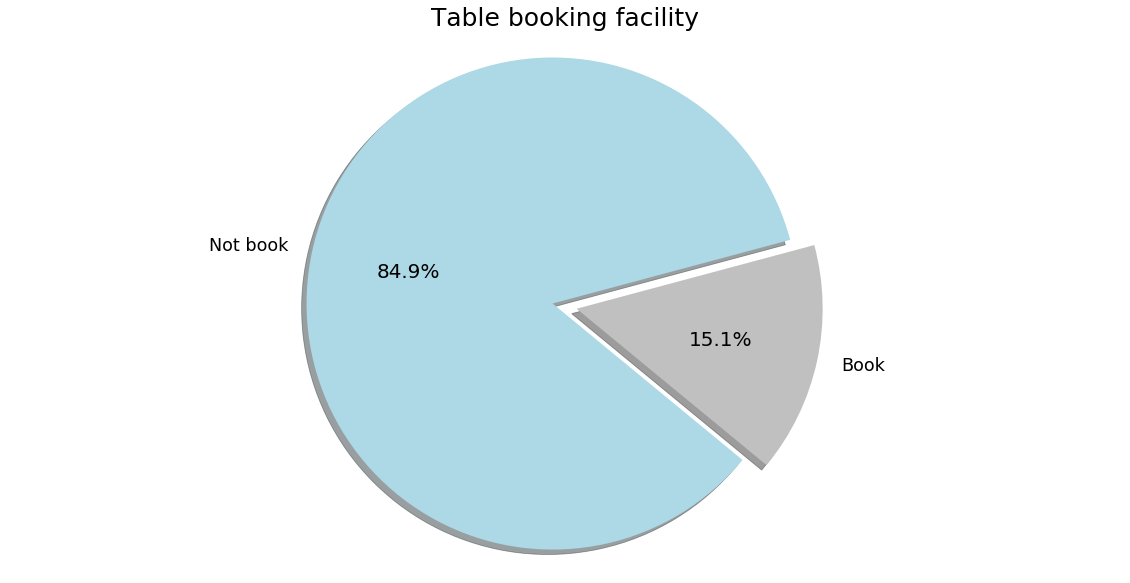

In [27]:
x = df["book_table"].value_counts()
labels = ["Not book","Book"]
my_colors = ["lightblue","silver"]
fig = plt.figure(figsize = (20, 10)) 
my_explode = (0, 0.1)
plt.pie(x, labels=labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title("Table booking facility")
plt.axis('equal')
plt.show()

This pie char shows how many restaurant provide the facility of booking table and how many don't provide

## Now analysing the types of restaurant we have.

In [28]:
df["rest_type"].dropna(inplace = True)

In [29]:
def plot(x,y,p,q):
    fig, ax = plt.subplots(figsize =(16, 9)) 
  
    # Horizontal Bar Plot 
    ax.barh(x, y,color="maroon") 
  
    # Remove axes splines 
    for s in ['top', 'bottom', 'left', 'right']: 
        ax.spines[s].set_visible(False) 
  
    # Remove x, y Ticks 
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none') 
  
    # Add padding between axes and labels 
    ax.xaxis.set_tick_params(pad = 5) 
    ax.yaxis.set_tick_params(pad = 10) 
  
    # Add x, y gridlines 
    ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2) 
  
    # Show top values  
    ax.invert_yaxis() 
  
    # Add annotation to bars 
    for i in ax.patches: 
        plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 
  
    #Plot title
    ax.set_title("Restaurant types vs the number of restaurant of that type",loc ='left', ) 
   
    # Add Text watermark 
    fig.text(0.9, 0.15, 'barh', fontsize = 12, 
         color ='grey', ha ='right', va ='bottom', 
         alpha = 0.7) 

    plt.xlabel(p) 
    plt.ylabel(q)

    #Showing Plot 
    plt.show() 
    

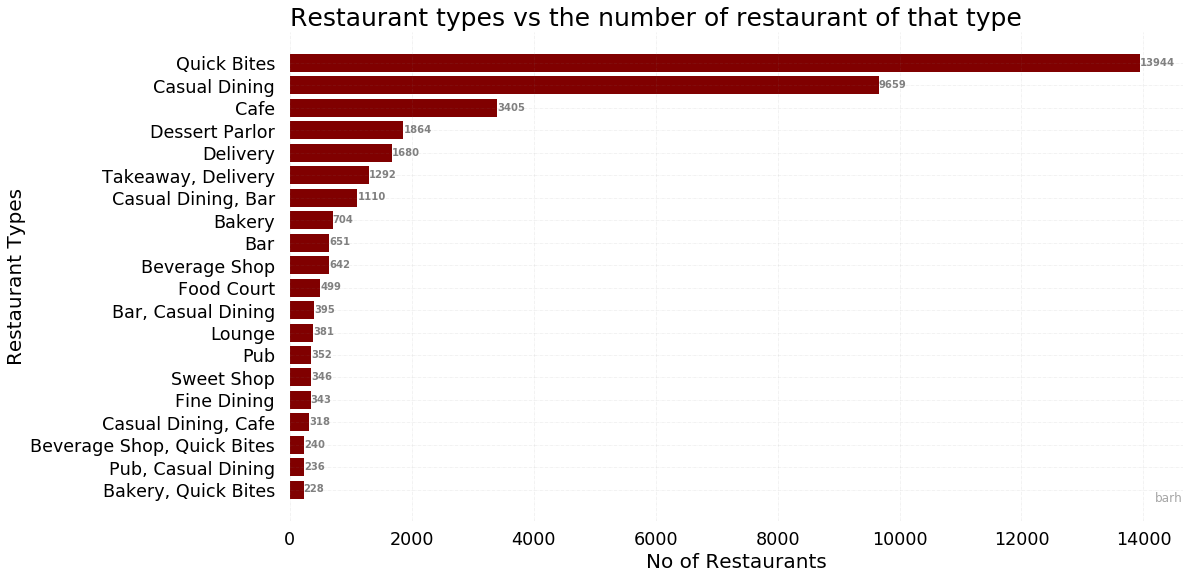

In [30]:
x=df["rest_type"].value_counts().nlargest(20).index
y=df["rest_type"].value_counts().nlargest(20)
p="No of Restaurants"
q="Restaurant Types"
plot(x,y,p,q)

From above we can see the top 20 restaurant types and their counts and also the quick bites ,casual dining and cafe are dominating over the other restaurant type by a huge margin of difference.

## Highest voted restaurants

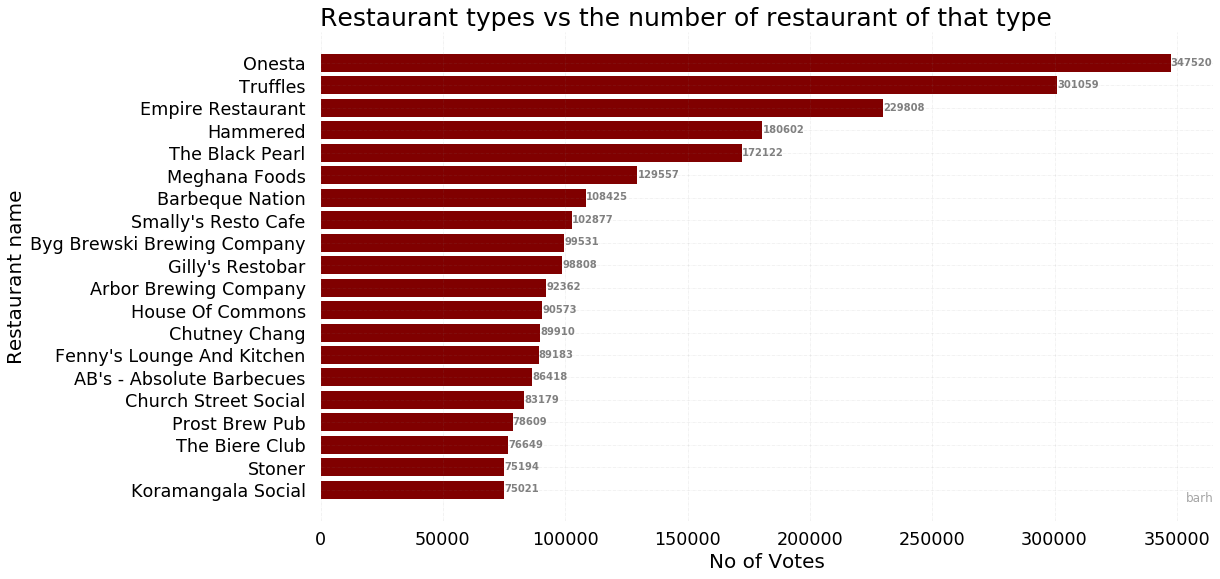

In [31]:
x=df.groupby("name")["votes"].sum().nlargest(20).index
y=df.groupby("name")["votes"].sum().nlargest(20)

p = "No of Votes" 
q="Restaurant name"
plot(x,y,p,q)

From above plot we can see that onesta is the highest voted restaurant(almost 350k people voted it) and the plot shows the top 20 highest voted restaurant.

## Number of restaurant location wise in bengaluru

In [32]:
restaurant=[]
location=[]
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [33]:
df_total=pd.DataFrame(zip(location,restaurant))
#Renaming the columns of above dataframe
df_total.columns=['location','restaurant']

In [35]:
df_total.to_csv("Number_of_restaurant_location_wise.csv",index=False)

In [36]:
df_total

,location,restaurant
0,BTM,516
1,Banashankari,219
2,Banaswadi,143
3,Bannerghatta Road,335
4,Basavanagudi,174
...,...,...
87,West Bangalore,2
88,Whitefield,588
89,Wilson Garden,32
90,Yelahanka,3


In [37]:
#Setting location as our index column
df_total.set_index('location',inplace=True)
df_total.sort_values(by='restaurant').tail(10)
#Below are the top 10 places in banglore which have highest number of restaurant

,restaurant
location,
Bellandur,266
Jayanagar,298
Bannerghatta Road,335
JP Nagar,373
Electronic City,438
Indiranagar,440
Marathahalli,495
HSR,512
BTM,516


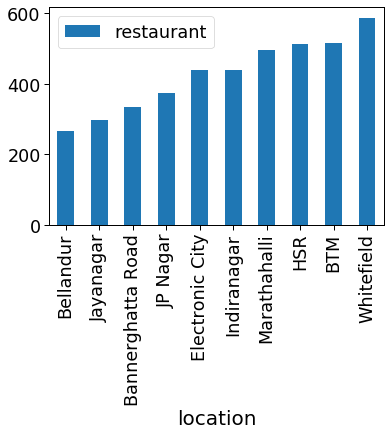

In [38]:
df_total.sort_values(by='restaurant').tail(10).plot.bar()

Above bar plot shows the top 10 places with highest number of restaurants and Whitefield one of the location with highest number of restaurants.

## Variety of restaurants in banglore

In [39]:
cuisines = df["cuisines"].value_counts()[0:10]
cuisines

North Indian                           2158
North Indian, Chinese                  1980
South Indian                           1234
Cafe                                    642
Bakery, Desserts                        615
Biryani                                 609
South Indian, North Indian, Chinese     561
Desserts                                551
Fast Food                               517
Chinese                                 410
Name: cuisines, dtype: int64

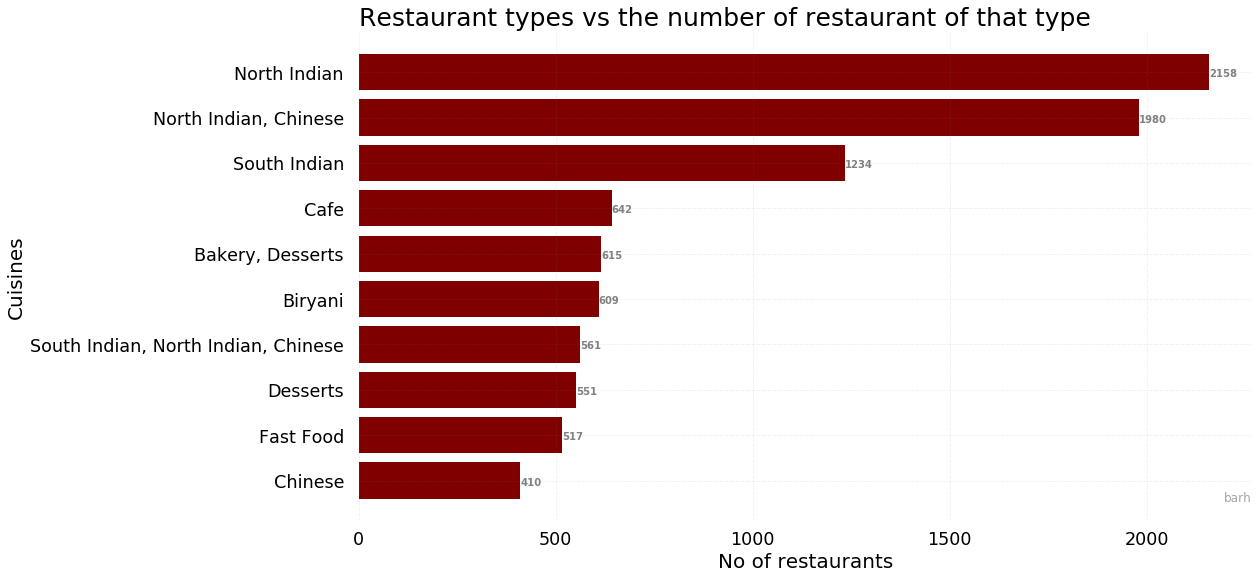

In [40]:
x=df["cuisines"].value_counts()[0:10].index
y=df["cuisines"].value_counts()[0:10]

p="No of restaurants" 
q="Cuisines"
plot(x,y,p,q)

So we can see from the above plot is that as though banglore lies in south part of india but it is more influenced by north indian culture as it is the largest tech hub in india and people from all over india comes for job in banglore and other neighbouring cities.

## Exploring the approx_cost(for two people) feature for restaurants

In [41]:
df["approx_cost(for two people)"].isna().sum()

247

In [42]:
df.dropna(axis ="index",subset=["approx_cost(for two people)"],inplace = True)

In [43]:
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7,34,+91 9980121279\n+91 9900240646,Whitefield,"Casual Dining, Bar",NaN,"North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


sns.distplot(df["approx_cost(for two people)"])


As we dont have actually the write data type to show the distribution plot so first we will convert it to right datatype

In [44]:
df["approx_cost(for two people)"].dtypes
#So as we can see that we have object datatype but to show its distribution approx cost should be an integer or float
#It should be consisting of some of the string values

dtype('O')

In [45]:
df["approx_cost(for two people)"].unique()
#So as we can see that we have 1,200 this type of values which contain commas and these commas are creating issue so first we need to handle these commas and remove them
#These are few things which we should take care of always while doing the exploratory data analysis

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '1,400', '2,000', '1,800',
       '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400',
       '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120',
       '5,000', '3,700', '1,650', '2,700', '4,500', '80'], dtype=object)

In [46]:
df["approx_cost(for two people)"] = df["approx_cost(for two people)"].apply(lambda x:x.replace(",",""))

In [47]:
df["approx_cost(for two people)"]=df["approx_cost(for two people)"].astype(int)
#So now we have transformed the values we are okk to go ahead with exploration

In [48]:
df["approx_cost(for two people)"].unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199, 1100, 1600,  230,  130, 1700, 1350, 2200, 1400, 2000, 1800,
       1900,  180,  330, 2500, 2100, 3000, 2800, 3400,   50,   40, 1250,
       3500, 4000, 2400, 2600, 1450,   70, 3200,  240, 6000, 1050, 2300,
       4100,  120, 5000, 3700, 1650, 2700, 4500,   80])

In [49]:
df["approx_cost(for two people)"].dtypes
#This is how we transform the datatypes of a feature in dataset

dtype('int64')

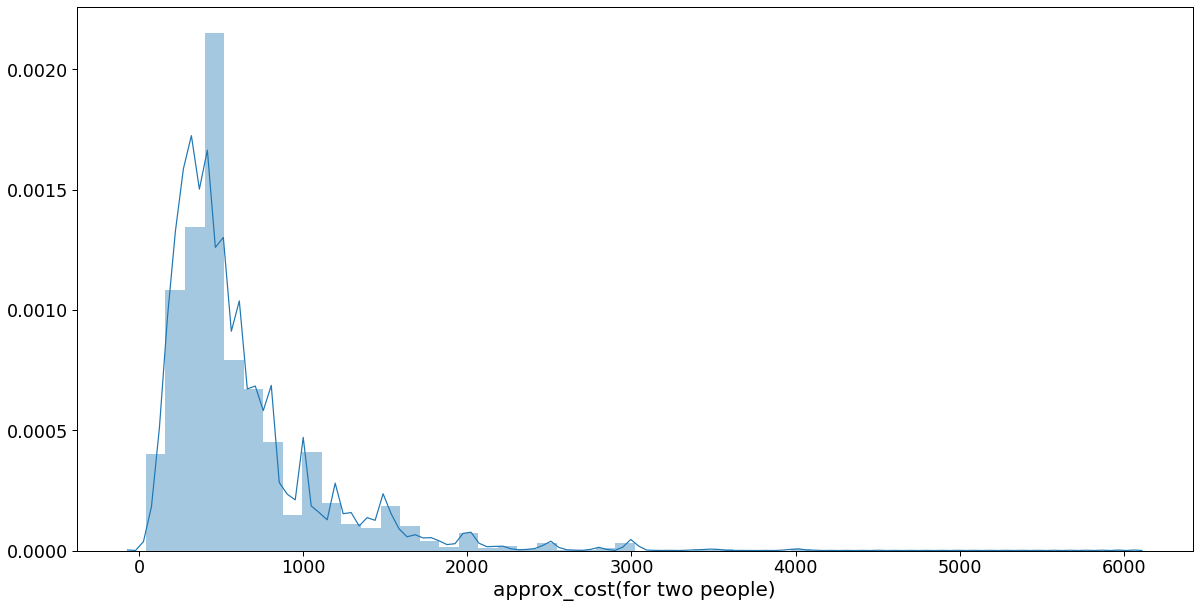

In [50]:
fig = plt.figure(figsize = (20, 10))
sns.distplot(df["approx_cost(for two people)"])
#This is what the distribution of approx_cost for two people looks like

One conclusion from above plot we can take is that approx 50% of restaurant are affordable for a normal people in banglore

Now checking the relationship between rating of a restaurant and approx cost for two people

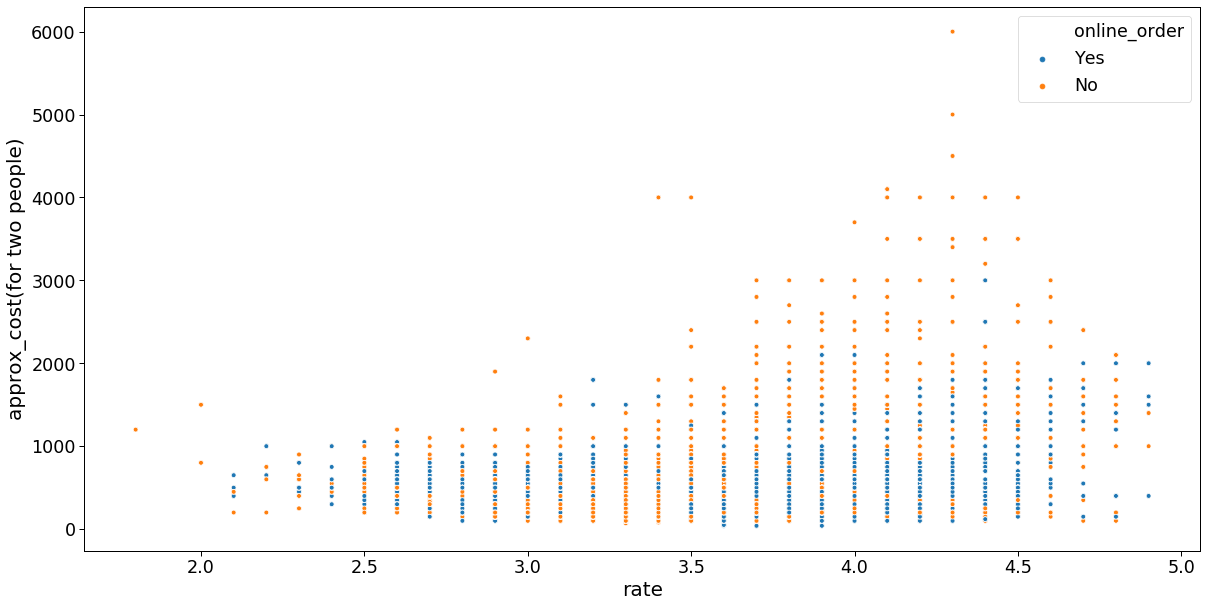

In [51]:
fig = plt.figure(figsize = (20, 10))
sns.scatterplot(x="rate",y="approx_cost(for two people)",hue="online_order",data = df)
#So this is what the scatter plot between rate and approx cost look like

## Analysing the difference between votes of restaurant accepting and not accepting online orders

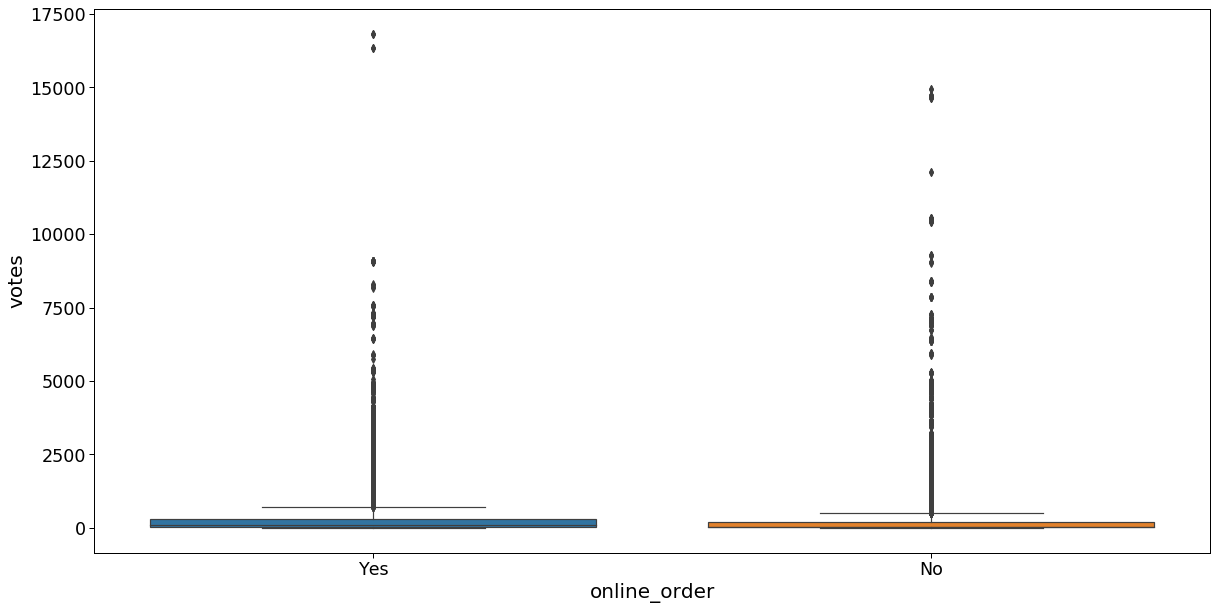

In [52]:
fig = plt.figure(figsize = (20, 10))
sns.boxplot(x="online_order",y="votes",data=df)

From the plot we can see that the restaurant which accept online orders are more rated then not accepting online orders.

This is quite obvious as people ordering online get's an option to vote(rate) the restaurant and most of the people also rate but in case of restaurant which do not accept online order people actually do not consider rating when they go for eating in person to a restaurant.

## Analysing the difference between price of restaurant accepting and not accepting online orders

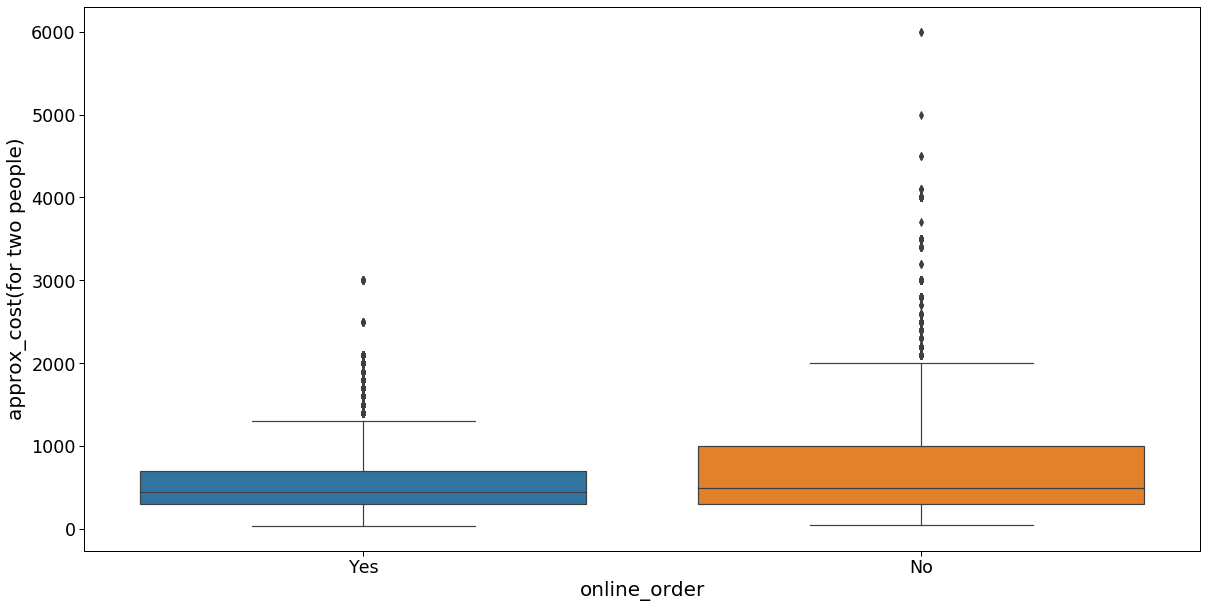

In [53]:
fig = plt.figure(figsize = (20, 10))
sns.boxplot(x="online_order",y="approx_cost(for two people)",data=df)

From the above plot one conclusion which we can come up is that restaurant accepting online orders are more affordable thn restaurant not accepting online orders.

Now days people prefer more to do an online order than an getting to restaurant in person for eating.

## Finding the most luxirious restaurants in banglore

In [54]:
#Checking the min and max value for approx cost for two people
df["approx_cost(for two people)"].min()

40

In [55]:
df["approx_cost(for two people)"].max()

6000

So from above we can see that we have 40 as minimum and 6000 as maximum value for the approx cost feature.

In [56]:
df[df["approx_cost(for two people)"]==6000]["name"]
#The Le Cirque Signature - The Leela Palace is the most luxirious restaurant/hotel in banglore

19139    Le Cirque Signature - The Leela Palace
45618    Le Cirque Signature - The Leela Palace
Name: name, dtype: object

In [57]:
df1 = df.copy()

In [58]:
df1.set_index("name",inplace=True)

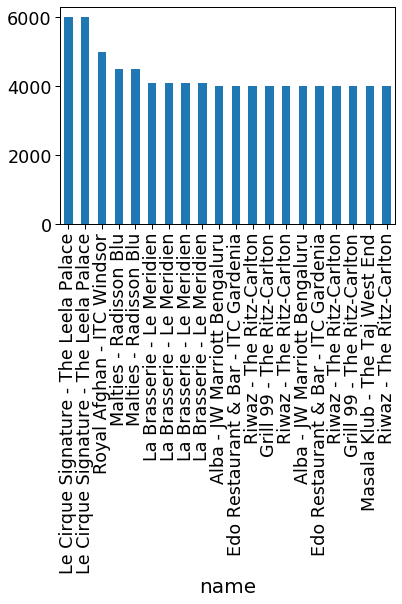

In [59]:
df1["approx_cost(for two people)"].nlargest(20).plot.bar()
#So these are most luxirious restaurants in banglore

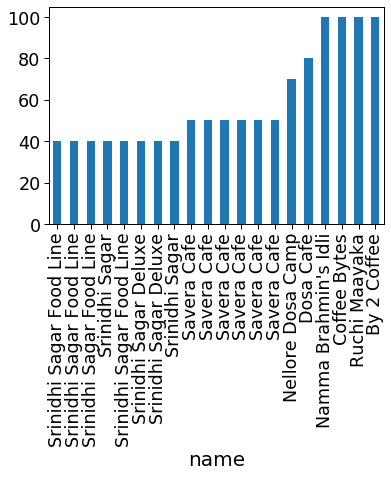

In [60]:
df1["approx_cost(for two people)"].nsmallest(20).plot.bar()
#So these are cheapest restaurants in banglore

## Finding the restaurant/hotel that are affordable for a middle class person(means approx cost for two people around 600)

In [61]:
df1[df1["approx_cost(for two people)"]<=600]

,url,address,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
name,,,,,,,,,,,,,,,,
Addhuri Udupi Bhojana,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
Grand Village,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
Timepass Dinner,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Yes,No,3.8,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
Onesta,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Yes,Yes,4.6,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
Smacznego,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Yes,No,4.2,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venice Kerala Restaurant,https://www.zomato.com/bangalore/venice-kerala...,"Opposite Brookfield Mall, Shiva Temple Road, B...",No,No,3.7,34,+91 8880059495,Brookefield,Quick Bites,NaN,Kerala,200,"[('Rated 5.0', 'RATED\n Loved this restaurant...",[],Dine-out,Whitefield
Thai & Chinese Fast Food,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",No,No,3.4,7,+91 9206260085\n+91 7619416923,KR Puram,Quick Bites,NaN,"Chinese, Thai",400,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
The Crunch,https://www.zomato.com/bangalore/the-crunch-br...,"33/1, Kundalahalli Road, Brookefield, Bangalore",No,No,3.3,6,+91 9016277963,Brookefield,Beverage Shop,NaN,Beverages,300,"[('Rated 3.0', 'RATED\n the sandwich was not ...",[],Dine-out,Whitefield


In [62]:
df_rest_under_budget=df1[df1["approx_cost(for two people)"]<=600].loc[:,("approx_cost(for two people)")]
df_rest_under_budget = df_rest_under_budget.reset_index()
df_rest_under_budget

,name,approx_cost(for two people)
0,Addhuri Udupi Bhojana,300
1,Grand Village,600
2,Timepass Dinner,600
3,Onesta,600
4,Smacznego,550
...,...,...
28488,Venice Kerala Restaurant,200
28489,Thai & Chinese Fast Food,400
28490,The Crunch,300
28491,Punjabi Charchay,400


In [63]:
df_rest_under_budget.drop_duplicates(subset=["name"], keep="last",inplace =True)
df_rest_under_budget.to_csv("Restaurant_under_budget.csv",index = False)

In [64]:
df_rest_under_budget["name"].unique()

array(['Kadalu Sea Food Restaurant', 'Katriguppe Donne Biryani',
       'Ruchi Maayaka', ..., 'The Crunch', 'Punjabi Charchay',
       'Raapchick'], dtype=object)

In [65]:
#Dropping all the duplicte values 
df_rest_under_budget.drop_duplicates(subset ="name",keep = False,inplace = True) 

In [66]:
df_rest_under_budget.reset_index(drop=True,inplace=True)

In [67]:
df_rest_under_budget
#Below are the restaurant/hotel under budget of normal person

,name,approx_cost(for two people)
0,Kadalu Sea Food Restaurant,500
1,Katriguppe Donne Biryani,300
2,Ruchi Maayaka,100
3,Vegetalia,400
4,Olive - Era,550
...,...,...
5021,Venice Kerala Restaurant,200
5022,Thai & Chinese Fast Food,400
5023,The Crunch,300
5024,Punjabi Charchay,400


## Finding the restaurant that have above rating 4 and affordable too

In [68]:
len(df[(df["rate"]>4) & (df["approx_cost(for two people)"]<=600)]["name"].unique())
#So we can see that we have around 457 restaurant/hotels in banglore which have a great rating as well as are affordable

457

In [69]:
df_good_and_affordable = df[(df["rate"]>4) & (df["approx_cost(for two people)"]<=600)][["name","approx_cost(for two people)"]]

In [70]:
df_good_and_affordable

,name,approx_cost(for two people)
7,Onesta,600
9,Smacznego,550
10,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,500
11,Cafe Shuffle,600
12,The Coffee Shack,500
...,...,...
51312,Biryani Kitchen,450
51313,Stoner,500
51345,The Wok Shop,500
51376,nu.tree,400


In [71]:
#Dropping all the duplicte values 
df_good_and_affordable.drop_duplicates(subset ="name",keep = "first",inplace = True) 
df_good_and_affordable.reset_index(drop=True,inplace=True)
df_good_and_affordable
#Below are the restaurant/hotel that are good under budget of normal person

,name,approx_cost(for two people)
0,Onesta,600
1,Smacznego,550
2,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,500
3,Cafe Shuffle,600
4,The Coffee Shack,500
...,...,...
452,Birbal Darbar,600
453,Biryani Rooh-e-Khaas,500
454,Captain Egg,400
455,4700BC Popcorn,500


In [72]:
df_good_and_affordable.to_csv("Restaurant_good_and_affordable.csv",index = False)

## Finding affordable restaurants/hotels at all locations in banglore

In [73]:
df_afford = df[(df["rate"]>4) & (df["approx_cost(for two people)"]<=600)]

In [74]:
location=[]
total=[]
for loc,location_df in df_afford.groupby('location'):
    location.append(loc)
    total.append(len(location_df['name'].unique()))

In [75]:
location_df=pd.DataFrame(zip(location,total))
location_df.columns=['location','restaurant']
location_df.set_index('location',inplace=True)

In [76]:
location_df
#The below dataframe shows the number of good and affordable restaurants in banglore at different locations

,restaurant
location,
BTM,32
Banashankari,21
Banaswadi,1
Bannerghatta Road,10
Basavanagudi,27
...,...
"Varthur Main Road, Whitefield",2
Vasanth Nagar,3
Vijay Nagar,2


In [77]:
location_df.to_csv("Affordable_restaurant_locations.csv",index = False)

Text(0, 0.5, 'Total restaurants')

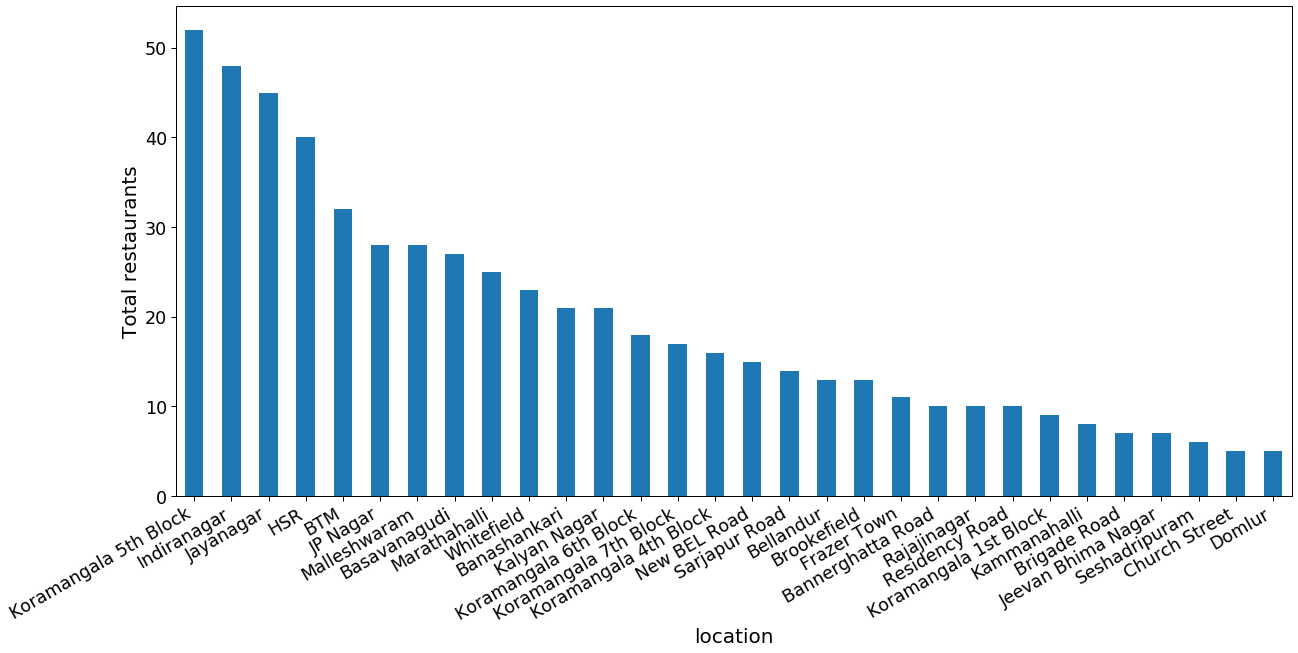

In [78]:
fig = plt.figure(figsize = (20, 10))
location_df['restaurant'].nlargest(30).plot.bar()
plt.gcf().autofmt_xdate()
plt.ylabel('Total restaurants')
#The number represent good and affordable restaurant resstaurants/hotels

## Now visualising the names of those good and affordable restaurants/hotels

In [79]:
location=[]
total=[]
for loc,location_df in df_afford.groupby('location'):
    location.append(loc)
    total.append(location_df['name'].unique())

In [80]:
afford=pd.DataFrame(zip(location,total))
afford.columns=['location','res_names']
afford.set_index('location',inplace=True)
afford.head()

,res_names
location,
BTM,"[eat.fit, XO Belgian Waffle, Swadista Aahar, L..."
Banashankari,"[Onesta, Smacznego, CafÃÂÃÂÃÂÃÂÃÂÃÂ..."
Banaswadi,[Corner House Ice Cream]
Bannerghatta Road,"[BOX8- Desi Meals, Cravy Wings, Waffle Walle, ..."
Basavanagudi,"[Kabab Magic, Sri Guru Kottureshwara Davangere..."


In [81]:
#W are creating a function in which we will provide the location and the restaurant type and will get the names of restaurant which are affordable
def return_budget(location,restaurant):
    budget=df[(df['approx_cost(for two people)']<=600) & (df['location']==location) & (df['rate']>4) & (df['rest_type']==restaurant)]
    return(budget['name'].unique())

In [82]:
return_budget('BTM',"Quick Bites")
#So below are the restaurants/hotels which are good and affordable and which are at location which we are searching for and the type of restaurant which we are looking for

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       'Hungry Lee', "Domino's Pizza", 'Roti Wala',
       'Mojo Pizza - 2X Toppings', 'Andhra Kitchen'], dtype=object)

## Now finding the most foodie areas 

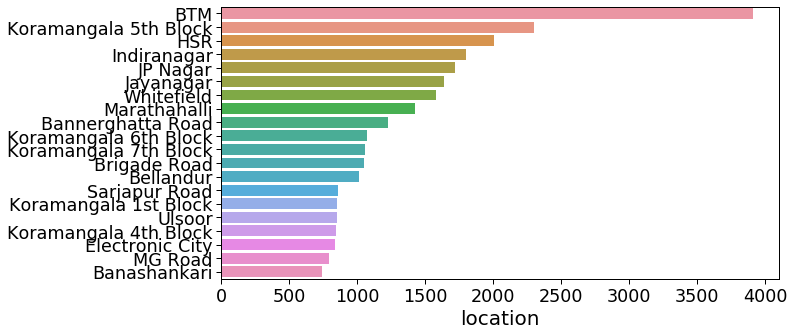

In [83]:
plt.figure(figsize=(10,5))
Restaurant_locations=df["location"].value_counts()[:20]
sns.barplot(Restaurant_locations,Restaurant_locations.index)

From above we can see that BTM,Koramangala 5th block,HSR,Indiranagar,Jpnagar are the most foodie areas in banglore as they conatain the majority of reataurants/hotels